In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

In [8]:
# INITIALIZE VARIABLES
N = 1000

T = 100
dt = 0.01

Kmin = 0
Kmax = 5
dK = 0.2

Kc=2*np.sqrt(2/np.pi)

t = np.arange(0, T+dt, dt)
Krange = np.arange(Kmin, Kmax+dK, dK)

thetas = np.zeros((N, t.size)) 

f = np.zeros(N)

r = np.zeros((Krange.size,t.size))
psi = np.zeros((Krange.size,t.size))

def timer(start,end):   # Show execution time in the format "hours : minutes : seconds"
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("Execution time (h:m:s): "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [12]:
#for index in range(5):
# RUN SIMULATION
start_time = time.time()     #Initial time for execution time calculation

for j in range(Krange.size):
    K = Krange[j]
    print("K: "+str(K))

    thetas[:,0] = np.random.uniform(0,2*np.pi,(1,N))  # the initial theta values: uniformly distributed
    omegas = np.random.normal(0,1,N) # normally distributed natural frequencies. mean 0, sd 1, size (N,1); row vector

    for i in range(0,t.size):
        z = 1/N*np.sum(np.exp(0+1j*thetas[:,i])) # order parameter

        r[j,i] = np.absolute(z) # modulus. 
        psi[j,i] = np.angle(z) # global phase. NOTE: remove array if not used.

        f = omegas + K*r[j,i]*np.sin(psi[j,i]-thetas[:,i])

        if i >= t.size-1:
            break
        thetas[:,i+1] = (thetas[:,i] + dt * f)%(2*np.pi)

print("Code finished.")
timer(start_time, time.time())       # Time of execution

# SAVE FILE
timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

np.savetxt("r_data_"+timestring+".csv", r, delimiter=",")

K: 0.0
K: 0.2
K: 0.4
K: 0.6000000000000001
K: 0.8
K: 1.0
K: 1.2000000000000002
K: 1.4000000000000001
K: 1.6
K: 1.8
K: 2.0
K: 2.2
K: 2.4000000000000004
K: 2.6
K: 2.8000000000000003
K: 3.0
K: 3.2
K: 3.4000000000000004
K: 3.6
K: 3.8000000000000003
K: 4.0
K: 4.2
K: 4.4
K: 4.6000000000000005
K: 4.800000000000001
K: 5.0
Code finished.
Execution time (h:m:s): 00:00:26.70


In [ ]:
# SAVE FILE
timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

np.savetxt("r_data_"+timestring+".csv", r, delimiter=",")

In [13]:
# LOAD FILE
filename = "r_data_2021-01-24_13-33-33.csv"
rsaved = np.loadtxt(filename, delimiter=',')

rinf = rsaved[:,-1]  # last element is r_inf = r(T)

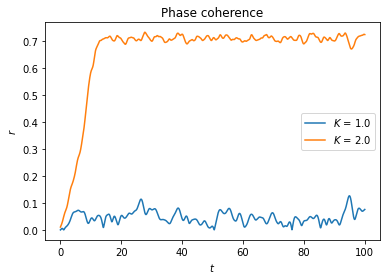

Code finished.


In [14]:
# (t,r) PLOT FROM SAVED FILE
# NOTE that Krange is not specified in the saved file!

for j in range(Krange.size):
    K=round(Krange[j],1)
    if K== 1 or K==2:
        plt.plot(t,rsaved[j,:],label=r'$K$'+" = "+str(K))
    
plt.title('Phase coherence')
plt.xlabel(r'$t$')
plt.ylabel(r'$r$')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 8},ncol=2)
plt.legend()

timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

plt.savefig("Phase_coherence"+timestring+".png", dpi=600, bbox_inches='tight')    
plt.show()
print("Code finished.")

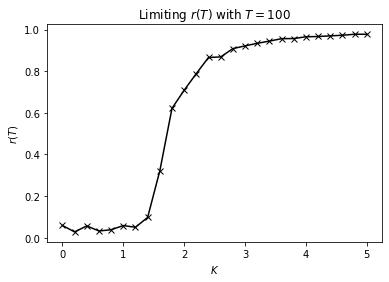

Code finished.


In [13]:
# (K,r(T)) PLOT FROM SAVED FILE
# NOTE that Krange is not specified in the saved file!

plt.plot(Krange, rinf,'-xk',label=r'$r(T)$')
#plt.axvline(x=Kc)

plt.title("Limiting "+r'$r(T)$' +" with " + r'$T=100$')
plt.xlabel(r'$K$')
plt.ylabel(r'$r(T)$')

timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

plt.savefig("Limiting_r_"+timestring+".png", dpi=600)    
plt.show()
print("Code finished.")

In [3]:
# AVERAGED (K,r(T)) PLOT FROM SAVED FILES
# LOAD FILES
file1 = "r_data_2021-01-23_16-56-31.csv"
file2 = "r_data_2021-01-23_16-56-04.csv"
file3 = "r_data_2021-01-23_16-55-35.csv"
file4 = "r_data_2021-01-23_16-55-08.csv"
file5 = "r_data_2021-01-23_16-54-40.csv"

rsaved = np.stack((np.loadtxt(file1, delimiter=','),np.loadtxt(file2, delimiter=','),np.loadtxt(file3, delimiter=','),np.loadtxt(file4, delimiter=','),np.loadtxt(file5, delimiter=',') ))

rmean = np.mean(rsaved[:,:,-1], axis=0)  # last element is r_inf = r(T)
rstd = np.std(rsaved[:,:,-1], axis=0)
print("Code finished.")

Code finished.


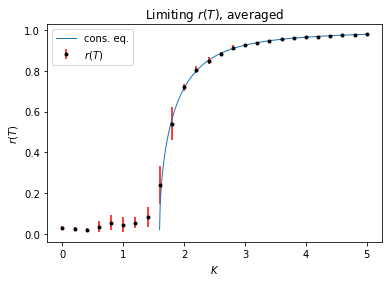

Code finished.


In [7]:
# PLOT
plt.plot(Krangecons, rcons,linewidth=1.0,label="cons. eq.")
plt.errorbar(Krange, rmean, yerr=rstd, fmt='.k', ecolor='r', capthick=1,label=r'$r(T)$')
#plt.axvline(x=Kc)

plt.title("Limiting "+r'$r(T)$'+", averaged")
plt.xlabel(r'$K$')
plt.ylabel(r'$r(T)$')
plt.legend()

timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

plt.savefig("Limiting_r_averaged_"+timestring+".png", dpi=600)    
plt.show()
print("Code finished.")

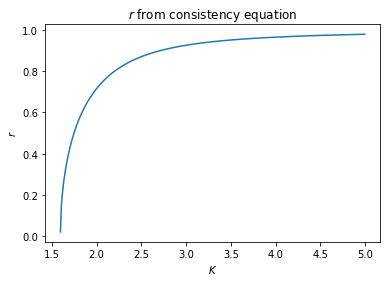

Code finished.


In [5]:
# PLOT FROM CONSISTENCY EQUATION
Krangecons=np.array([1.596, 1.606, 1.616, 1.626, 1.636, 1.646, 1.656, 1.666, 1.676, 1.686, \
1.696, 1.706, 1.716, 1.726, 1.736, 1.746, 1.756, 1.766, 1.776, 1.786, \
1.796, 1.806, 1.816, 1.826, 1.836, 1.846, 1.856, 1.866, 1.876, 1.886, \
1.896, 1.906, 1.916, 1.926, 1.936, 1.946, 1.956, 1.966, 1.976, 1.986, \
1.996, 2.006, 2.016, 2.026, 2.036, 2.046, 2.056, 2.066, 2.076, 2.086, \
2.096, 2.106, 2.116, 2.126, 2.136, 2.146, 2.156, 2.166, 2.176, 2.186, \
2.196, 2.206, 2.216, 2.226, 2.236, 2.246, 2.256, 2.266, 2.276, 2.286, \
2.296, 2.306, 2.316, 2.326, 2.336, 2.346, 2.356, 2.366, 2.376, 2.386, \
2.396, 2.406, 2.416, 2.426, 2.436, 2.446, 2.456, 2.466, 2.476, 2.486, \
2.496, 2.506, 2.516, 2.526, 2.536, 2.546, 2.556, 2.566, 2.576, 2.586, \
2.596, 2.606, 2.616, 2.626, 2.636, 2.646, 2.656, 2.666, 2.676, 2.686, \
2.696, 2.706, 2.716, 2.726, 2.736, 2.746, 2.756, 2.766, 2.776, 2.786, \
2.796, 2.806, 2.816, 2.826, 2.836, 2.846, 2.856, 2.866, 2.876, 2.886, \
2.896, 2.906, 2.916, 2.926, 2.936, 2.946, 2.956, 2.966, 2.976, 2.986, \
2.996, 3.006, 3.016, 3.026, 3.036, 3.046, 3.056, 3.066, 3.076, 3.086, \
3.096, 3.106, 3.116, 3.126, 3.136, 3.146, 3.156, 3.166, 3.176, 3.186, \
3.196, 3.206, 3.216, 3.226, 3.236, 3.246, 3.256, 3.266, 3.276, 3.286, \
3.296, 3.306, 3.316, 3.326, 3.336, 3.346, 3.356, 3.366, 3.376, 3.386, \
3.396, 3.406, 3.416, 3.426, 3.436, 3.446, 3.456, 3.466, 3.476, 3.486, \
3.496, 3.506, 3.516, 3.526, 3.536, 3.546, 3.556, 3.566, 3.576, 3.586, \
3.596, 3.606, 3.616, 3.626, 3.636, 3.646, 3.656, 3.666, 3.676, 3.686, \
3.696, 3.706, 3.716, 3.726, 3.736, 3.746, 3.756, 3.766, 3.776, 3.786, \
3.796, 3.806, 3.816, 3.826, 3.836, 3.846, 3.856, 3.866, 3.876, 3.886, \
3.896, 3.906, 3.916, 3.926, 3.936, 3.946, 3.956, 3.966, 3.976, 3.986, \
3.996, 4.006, 4.016, 4.026, 4.036, 4.046, 4.056, 4.066, 4.076, 4.086, \
4.096, 4.106, 4.116, 4.126, 4.136, 4.146, 4.156, 4.166, 4.176, 4.186, \
4.196, 4.206, 4.216, 4.226, 4.236, 4.246, 4.256, 4.266, 4.276, 4.286, \
4.296, 4.306, 4.316, 4.326, 4.336, 4.346, 4.356, 4.366, 4.376, 4.386, \
4.396, 4.406, 4.416, 4.426, 4.436, 4.446, 4.456, 4.466, 4.476, 4.486, \
4.496, 4.506, 4.516, 4.526, 4.536, 4.546, 4.556, 4.566, 4.576, 4.586, \
4.596, 4.606, 4.616, 4.626, 4.636, 4.646, 4.656, 4.666, 4.676, 4.686, \
4.696, 4.706, 4.716, 4.726, 4.736, 4.746, 4.756, 4.766, 4.776, 4.786, \
4.796, 4.806, 4.816, 4.826, 4.836, 4.846, 4.856, 4.866, 4.876, 4.886, \
4.896, 4.906, 4.916, 4.926, 4.936, 4.946, 4.956, 4.966, 4.976, 4.986, \
4.996])

rcons=np.array([0.0213166, 0.141017, 0.197075, 0.23943, 0.274523, 0.304895, 0.331864, \
0.356219, 0.378483, 0.399018, 0.418093, 0.435913, 0.452636, 0.46839, \
0.483281, 0.497395, 0.510806, 0.523576, 0.535758, 0.5474, 0.558542, \
0.56922, 0.579467, 0.589311, 0.598777, 0.60789, 0.61667, 0.625135, \
0.633305, 0.641194, 0.648817, 0.656188, 0.66332, 0.670224, 0.676911, \
0.68339, 0.689672, 0.695765, 0.701677, 0.707416, 0.71299, 0.718404, \
0.723665, 0.72878, 0.733754, 0.738593, 0.743301, 0.747883, 0.752345, \
0.75669, 0.760922, 0.765046, 0.769065, 0.772983, 0.776803, 0.780528, \
0.784163, 0.787708, 0.791169, 0.794546, 0.797843, 0.801063, 0.804207, \
0.807278, 0.810278, 0.81321, 0.816075, 0.818875, 0.821613, 0.824289, \
0.826907, 0.829467, 0.831971, 0.834421, 0.836818, 0.839163, 0.841459, \
0.843706, 0.845906, 0.84806, 0.850169, 0.852235, 0.854258, 0.85624, \
0.858181, 0.860084, 0.861948, 0.863775, 0.865565, 0.867321, 0.869041, \
0.870729, 0.872383, 0.874005, 0.875597, 0.877157, 0.878688, 0.880191, \
0.881664, 0.88311, 0.88453, 0.885923, 0.88729, 0.888632, 0.889949, \
0.891243, 0.892513, 0.89376, 0.894985, 0.896189, 0.89737, 0.898531, \
0.899672, 0.900793, 0.901894, 0.902976, 0.904039, 0.905085, 0.906112, \
0.907122, 0.908115, 0.909091, 0.910051, 0.910995, 0.911923, 0.912836, \
0.913734, 0.914618, 0.915487, 0.916342, 0.917183, 0.918011, 0.918825, \
0.919627, 0.920416, 0.921192, 0.921956, 0.922709, 0.92345, 0.924179, \
0.924897, 0.925605, 0.926301, 0.926987, 0.927663, 0.928328, 0.928984, \
0.92963, 0.930266, 0.930893, 0.931511, 0.93212, 0.93272, 0.933312, \
0.933895, 0.934469, 0.935036, 0.935594, 0.936145, 0.936688, 0.937223, \
0.937751, 0.938271, 0.938785, 0.939291, 0.939791, 0.940284, 0.94077, \
0.94125, 0.941723, 0.94219, 0.942651, 0.943106, 0.943555, 0.943998, \
0.944435, 0.944867, 0.945293, 0.945713, 0.946129, 0.946539, 0.946944, \
0.947344, 0.947739, 0.948129, 0.948514, 0.948894, 0.94927, 0.949641, \
0.950008, 0.95037, 0.950728, 0.951082, 0.951432, 0.951777, 0.952119, \
0.952456, 0.952789, 0.953119, 0.953445, 0.953767, 0.954085, 0.9544, \
0.954711, 0.955019, 0.955323, 0.955624, 0.955921, 0.956216, 0.956507, \
0.956794, 0.957079, 0.957361, 0.957639, 0.957915, 0.958187, 0.958457, \
0.958724, 0.958988, 0.959249, 0.959508, 0.959764, 0.960017, 0.960267, \
0.960515, 0.960761, 0.961004, 0.961244, 0.961482, 0.961718, 0.961951, \
0.962182, 0.962411, 0.962638, 0.962862, 0.963084, 0.963304, 0.963522, \
0.963737, 0.963951, 0.964163, 0.964372, 0.96458, 0.964785, 0.964989, \
0.965191, 0.965391, 0.965589, 0.965785, 0.965979, 0.966172, 0.966362, \
0.966552, 0.966739, 0.966925, 0.967109, 0.967291, 0.967472, 0.967651, \
0.967828, 0.968004, 0.968179, 0.968352, 0.968523, 0.968693, 0.968861, \
0.969028, 0.969194, 0.969358, 0.969521, 0.969682, 0.969842, 0.970001, \
0.970158, 0.970314, 0.970469, 0.970622, 0.970774, 0.970925, 0.971075, \
0.971223, 0.97137, 0.971516, 0.971661, 0.971805, 0.971947, 0.972089, \
0.972229, 0.972368, 0.972506, 0.972643, 0.972779, 0.972914, 0.973047, \
0.97318, 0.973312, 0.973442, 0.973572, 0.973701, 0.973828, 0.973955, \
0.974081, 0.974205, 0.974329, 0.974452, 0.974574, 0.974695, 0.974815, \
0.974934, 0.975052, 0.97517, 0.975286, 0.975402, 0.975517, 0.975631, \
0.975744, 0.975857, 0.975968, 0.976079, 0.976189, 0.976298, 0.976406, \
0.976514, 0.976621, 0.976727, 0.976832, 0.976937, 0.977041, 0.977144, \
0.977246, 0.977348, 0.977449, 0.977549, 0.977648, 0.977747, 0.977846, \
0.977943, 0.97804, 0.978136, 0.978232, 0.978327])

plt.plot(Krangecons, rcons,label=r'$r(T)$')
#plt.axvline(x=Kc)

plt.title(r'$r$'+" from consistency equation")
plt.xlabel(r'$K$')
plt.ylabel(r'$r$')

plt.savefig("analytical_r", dpi=600)    
plt.show()
print("Code finished.")